# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

In [174]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Загрузка датасета

#### Описание датасета

* данные: содержит информацию для различных домов
* целевая переменная: MEDV (цены домов в тысячах долларов)


 Набор содержит 13 признаков:
 * CRIM:     Уровень преступности на душу населения
 * ZN:       Доля жилой земли, выделенной для участков более 25 000 квадратных футов
 * INDUS:    Доля не торговых бизнес акров на город
 * CHAS:     Переменная реки Чарлз (равна 1 если рядом река, 0 если нет)
 * NOX:      Концентрация оксидов азота (частей на 10 миллионов)
 * RM:       Среднее количество комнат на жилье
 * AGE:      Пропорция домов частных владельцев, построенных до 1940 года
 * DIS:      Взвешенные расстояния до пяти рабочих центров Бостона
 * RAD:      Индекс доступности близлежащих автомагистралей
 * TAX:      Полная стоимость налога на имущество на 10 000 долларов США
 * PTRATIO:  Среднее количество учителей для детей на город
 * B        1000(Bk - 0.63)^2 , где Bk - это пропорция афроамериканцев на город
 * LSTAT:    Процент населения с низким социальным статусом


In [176]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

print('train_data.shape', train_data.shape)  #(404, 13)
print('test_data.shape ', test_data.shape)  #(102, 13)

train_data.shape (404, 13)
test_data.shape  (102, 13)


In [102]:
# данные имеют разные масштабы
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [103]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [104]:
# Метки
print(train_labels[0:10])  # Отобразим первые 10

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


### Модель 1

In [105]:
# Нормализация.
scaler = MinMaxScaler((-1,1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

print(X_train[0])  # Первый тренировочный пример, нормализованный

[-9.72436739e-01 -1.00000000e+00 -4.36950147e-01 -1.00000000e+00
 -3.70370370e-01 -3.87296669e-04  8.29042225e-01 -4.05617544e-01
 -7.39130435e-01 -5.44933078e-01  7.87234043e-01  1.00000000e+00
 -6.23620309e-02]


* активации линейные
* функция потерь - среднеквадратичная ошибка
* метрика - среднеквадратичная ошибка
* 10 эпох по 1 примеру в батче

In [106]:
boston_model1 = Sequential([
    Dense(20, activation='linear', input_shape=(13,)),
    Dense(20, activation='linear'),
    Dense(1, activation='linear')
])

boston_model1.compile(optimizer='adam',
                     loss='mean_squared_error',
                     metrics=['mean_squared_error'])

boston_model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_49 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 21        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [107]:
boston_history1 = boston_model1.fit( X_train, y_train,
  epochs=10,
  batch_size=1, validation_split=0.2
)

Epoch 1/10
323/323 [==============================] - 1s 2ms/step - loss: 222.9600 - mean_squared_error: 222.9600 - val_loss: 59.5747 - val_mean_squared_error: 59.5747
Epoch 2/10
323/323 [==============================] - 1s 2ms/step - loss: 45.3090 - mean_squared_error: 45.3090 - val_loss: 48.2077 - val_mean_squared_error: 48.2077
Epoch 3/10
323/323 [==============================] - 1s 2ms/step - loss: 34.2375 - mean_squared_error: 34.2375 - val_loss: 36.3266 - val_mean_squared_error: 36.3266
Epoch 4/10
323/323 [==============================] - 1s 2ms/step - loss: 28.8315 - mean_squared_error: 28.8315 - val_loss: 29.6196 - val_mean_squared_error: 29.6196
Epoch 5/10
323/323 [==============================] - 1s 2ms/step - loss: 25.9608 - mean_squared_error: 25.9608 - val_loss: 28.0061 - val_mean_squared_error: 28.0061
Epoch 6/10
323/323 [==============================] - 1s 2ms/step - loss: 25.6171 - mean_squared_error: 25.6171 - val_loss: 26.4845 - val_mean_squared_error: 26.4845
Ep

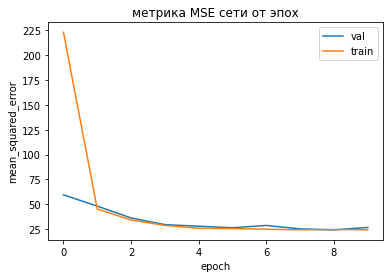

In [108]:
plt.plot(boston_history1.history['val_mean_squared_error'] ,label='val')
plt.plot(boston_history1.history['mean_squared_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.title('метрика MSE сети от эпох')
plt.show()

In [109]:
# Коэффициент детерминации на предсказании тестовой выборки
y_test_pred = boston_model1.predict(X_test)
r2_score(y_test, y_test_pred)

0.7194432768001229

## Модель 2

In [177]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [178]:
# Нормализация
scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[0])  # Первый тренировочный пример, нормализованный

[-0.99830167 -1.         -0.82184751 -1.         -0.75308642  0.64949651
 -0.29969104 -0.50617387 -0.91304348 -0.66347992  0.14893617  0.98300469
 -0.89845475]


* активации relu
* функция потерь - среднеквадратичная ошибка
* метрика - средняя абсолютная ошибка
* 200 эпох по 1 примеру в батче

In [179]:
boston_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, )
])


boston_model2.compile(optimizer=RMSprop(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

boston_model2.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_76 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [180]:
boston_history2 = boston_model2.fit( train_data, train_labels,
  epochs=200,
  batch_size=1, validation_split=0.2
)

Epoch 1/200
323/323 [==============================] - 1s 2ms/step - loss: 137.6967 - mean_absolute_error: 8.2258 - val_loss: 37.3211 - val_mean_absolute_error: 4.2285
Epoch 2/200
323/323 [==============================] - 1s 2ms/step - loss: 36.7804 - mean_absolute_error: 4.0110 - val_loss: 25.9680 - val_mean_absolute_error: 3.5815
Epoch 3/200
323/323 [==============================] - 1s 2ms/step - loss: 27.6665 - mean_absolute_error: 3.4191 - val_loss: 21.5651 - val_mean_absolute_error: 3.1068
Epoch 4/200
323/323 [==============================] - 1s 2ms/step - loss: 23.2229 - mean_absolute_error: 3.1602 - val_loss: 18.4642 - val_mean_absolute_error: 2.8926
Epoch 5/200
323/323 [==============================] - 1s 2ms/step - loss: 21.7087 - mean_absolute_error: 3.1318 - val_loss: 17.4399 - val_mean_absolute_error: 2.7666
Epoch 6/200
323/323 [==============================] - 1s 2ms/step - loss: 19.8036 - mean_absolute_error: 2.9787 - val_loss: 15.7112 - val_mean_absolute_error: 2.49

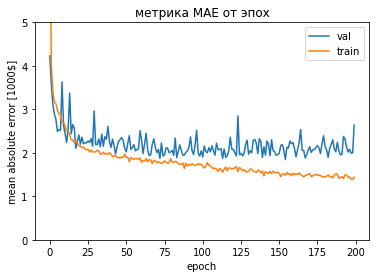

In [181]:
plt.plot(boston_history2.history['val_mean_absolute_error'] ,label='val')
plt.plot(boston_history2.history['mean_absolute_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean absolute error [1000$]')
plt.title('метрика MAE от эпох')
plt.ylim([0, 5])
plt.show()

In [194]:
result2 = []
# Коэффициент детерминации на предсказании тестовой выборки
y_test_pred2 = boston_model2.predict(test_data)
r2_score(test_labels, y_test_pred2)

0.8261367950902445

In [195]:
[loss, mae] = boston_model2.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2888.54


In [196]:
result2.append([r2_score(test_labels, y_test_pred2), loss, mae])
print(result2)

[[0.8261367950902445, 14.473042488098145, 2.8885395526885986]]


### Прогнозирование

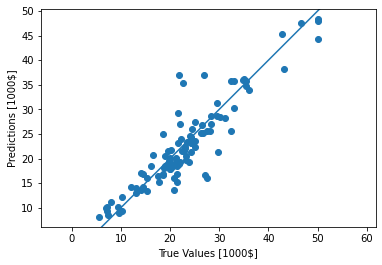

In [150]:
# сделаем прогноз нескольких цен, используя данные тестового набора

test_predictions = boston_model2.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

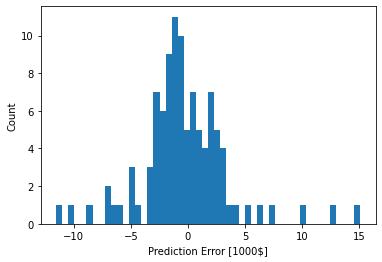

In [151]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")

### Модель 3

In [152]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [153]:
# Нормализация
# mean = train_data.mean(axis=0)
# std = train_data.std(axis=0)
# train_data = (train_data - mean) / std
# test_data = (test_data - mean) / std
scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[0])  # Первый тренировочный пример, нормализованный

[-0.99800382 -1.         -0.0931085  -1.         -0.78600823  0.05538342
 -0.13285273 -0.29587608 -0.65217391 -0.19694073  0.29787234  0.93106057
 -0.60209713]


Подготовим train_labels для применения функции sigmoid на выходе

In [154]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = train_labels.min()

max_y = train_labels.max() - min_y #"опустим" максимум на min_y
train_labels = (train_labels - min_y) / max_y #отклонение от минимума к амплитуде

# нормируем ответы тестовой выборки, используя статистику min_y и max_y тренировочной 
test_labels = (test_labels - min_y) / max_y

* активации relu, на выходе sigmoid
* функция потерь - среднеквадратичная ошибка
* метрика - средняя абсолютная ошибка
* 200 эпох по 1 примеру в батче

In [155]:
boston_model3 = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid, т.к. данные от 0 до 1
])


boston_model3.compile(optimizer=RMSprop(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mean_absolute_error'])

boston_model3.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [156]:
boston_history3 = boston_model3.fit( train_data, train_labels,
  epochs=200,
  batch_size=1, validation_split=0.2
)

Epoch 1/200
323/323 [==============================] - 1s 2ms/step - loss: 0.0253 - mean_absolute_error: 0.1061 - val_loss: 0.0130 - val_mean_absolute_error: 0.0895
Epoch 2/200
323/323 [==============================] - 1s 2ms/step - loss: 0.0135 - mean_absolute_error: 0.0738 - val_loss: 0.0091 - val_mean_absolute_error: 0.0754
Epoch 3/200
323/323 [==============================] - 1s 2ms/step - loss: 0.0111 - mean_absolute_error: 0.0692 - val_loss: 0.0078 - val_mean_absolute_error: 0.0716
Epoch 4/200
323/323 [==============================] - 1s 2ms/step - loss: 0.0100 - mean_absolute_error: 0.0644 - val_loss: 0.0060 - val_mean_absolute_error: 0.0608
Epoch 5/200
323/323 [==============================] - 1s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.0614 - val_loss: 0.0064 - val_mean_absolute_error: 0.0603
Epoch 6/200
323/323 [==============================] - 1s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.0589 - val_loss: 0.0059 - val_mean_absolute_error: 0.0614
Epoch 7/20

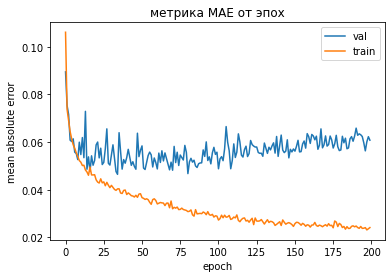

In [157]:
plt.plot(boston_history3.history['val_mean_absolute_error'] ,label='val')
plt.plot(boston_history3.history['mean_absolute_error'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mean absolute error')
plt.title('метрика MAE от эпох')
plt.show()

In [158]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
y_test_pred3 = boston_model3.predict(test_data).flatten() 
# Возвращаем к прежнему размеру
y_test_pred3 = y_test_pred3 * max_y + min_y 
test_labels = test_labels * max_y + min_y

In [159]:
# Коэффициент детерминации на предсказании тестовой выборки
r2_score(test_labels, y_test_pred3)

0.7336800445241516

In [160]:
# Средний модуль отклонения 
[loss, mae] = boston_model3.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $22669.25


### Модель с 10-15 вариантами комбинаций функции потерь и метрик

In [211]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

# Перемешаем тренировочные данные
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [212]:
# Нормализация
scaler = MinMaxScaler((-1,1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

* активации relu
* функция потерь - среднеквадратичная ошибка, средняя абсолютная ошибка, средняя абсолютная ошибка в процентах
* метрика - среднеквадратичная ошибка, средняя абсолютная ошибка, средняя абсолютная ошибка в процентах
* 200 эпох по 1 примеру в батче

In [213]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, )
])

result = []

# сетка параметров
loss_space = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics_space = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

for loss_item in loss_space:
    for metrics_item in metrics_space:
    
        model.compile(optimizer=RMSprop(learning_rate=0.001),
                             loss=loss_item,
                             metrics=[metrics_item])
        
        model.fit( train_data, train_labels,
                        epochs=200,
                        batch_size=1, validation_split=0.2
                        )
        
        # Коэффициент детерминации на предсказании тестовой выборки
        y_test_pred = model.predict(test_data)
        
        [loss, metric] = model.evaluate(test_data, test_labels, verbose=0)
               
        # накопление результатов
        result.append([loss_item, loss, metrics_item, metric, r2_score(test_labels, y_test_pred)])   

Epoch 1/200
323/323 [==============================] - 1s 2ms/step - loss: 155.6852 - mean_squared_error: 155.6852 - val_loss: 56.0255 - val_mean_squared_error: 56.0255
Epoch 2/200
323/323 [==============================] - 1s 2ms/step - loss: 39.8606 - mean_squared_error: 39.8606 - val_loss: 32.7077 - val_mean_squared_error: 32.7077
Epoch 3/200
323/323 [==============================] - 1s 2ms/step - loss: 27.0321 - mean_squared_error: 27.0321 - val_loss: 25.8639 - val_mean_squared_error: 25.8639
Epoch 4/200
323/323 [==============================] - 1s 2ms/step - loss: 24.1109 - mean_squared_error: 24.1109 - val_loss: 20.7676 - val_mean_squared_error: 20.7676
Epoch 5/200
323/323 [==============================] - 1s 2ms/step - loss: 21.3555 - mean_squared_error: 21.3555 - val_loss: 19.9777 - val_mean_squared_error: 19.9777
Epoch 6/200
323/323 [==============================] - 1s 2ms/step - loss: 19.6817 - mean_squared_error: 19.6817 - val_loss: 20.7178 - val_mean_squared_error: 20.7

In [214]:
# Оценки на тестовой выборке
pd.DataFrame(result, columns=['loss_item','loss',
                              'metrics_item', 'metric',
                              'r2_score(test_labels, y_test_pred)']).\
                              sort_values('r2_score(test_labels, y_test_pred)',ascending=False).head(10)

,loss_item,loss,metrics_item,metric,"r2_score(test_labels, y_test_pred)"
8,mean_absolute_percentage_error,14.897001,mean_absolute_percentage_error,14.897001,0.844334
6,mean_absolute_percentage_error,14.102732,mean_squared_error,13.009427,0.843719
3,mean_absolute_error,2.499794,mean_squared_error,13.130987,0.842259
7,mean_absolute_percentage_error,14.180434,mean_absolute_error,2.655819,0.839626
2,mean_squared_error,13.502874,mean_absolute_percentage_error,13.350696,0.837791
1,mean_squared_error,14.689522,mean_absolute_error,2.595822,0.823536
4,mean_absolute_error,2.614107,mean_absolute_error,2.614107,0.821559
5,mean_absolute_error,2.594769,mean_absolute_percentage_error,13.933036,0.809305
0,mean_squared_error,16.596428,mean_squared_error,16.596428,0.800629


**Вывод:** 

Точность сети помогли улучшить:
*  выбор активатора, 
* подбор количества эпох (на уровне 200 оптимальное количество, количество более 200 - это излишне), 
* выбор loss, metrics.